In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA에서 저장한 데이터 불러오기
df = pd.read_csv('../data/processed/okcupid_cleaned.csv')
print(f"데이터 shape: {df.shape}")
print(df.head())

데이터 shape: (58754, 31)
   age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other

In [2]:
import matplotlib.font_manager as fm  # 한글폰트(굴림체) 설치
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [3]:
# 필수 컬럼
required_columns = [
    "sex", "orientation", "body_type", "drinks", "drugs", "education",
    "height", "job", "last_online", "religion", "sign", "smokes"
]

# keep 컬럼
keep_columns = ["age", "status", "diet", "ethnicity", "location", "pets"]

# 사용 컬럼만 선택
use_columns = required_columns + keep_columns
df = df[use_columns].copy()

print(f"선택후 shape: {df.shape}")
print(df.columns.tolist())

선택후 shape: (58754, 18)
['sex', 'orientation', 'body_type', 'drinks', 'drugs', 'education', 'height', 'job', 'last_online', 'religion', 'sign', 'smokes', 'age', 'status', 'diet', 'ethnicity', 'location', 'pets']


In [4]:
# target column (churn) 생성
# last_online 기준 180일 이상 접속 안 한 유저를 이탈 1로 정의함

# last_online을 날짜형으로 변환
df['last_online'] = pd.to_datetime(df['last_online'].str[:10], format="%Y-%m-%d")

# 기준일 = 가장 최근 접속일
reference_date = df['last_online'].max()
print(f"기준일: {reference_date}")

# 180일 이상 미접속 → 이탈(1)
df['churn'] = ((reference_date - df['last_online']).dt.days > 180).astype(int)

# 결과 확인
print('\n이탈 여부 분포:')
print(df['churn'].value_counts())
print('\n이탈 비율:')
print(df['churn'].value_counts(normalize=True) * 100)

기준일: 2012-07-01 00:00:00

이탈 여부 분포:
churn
0    54088
1     4666
Name: count, dtype: int64

이탈 비율:
churn
0    92.058413
1     7.941587
Name: proportion, dtype: float64


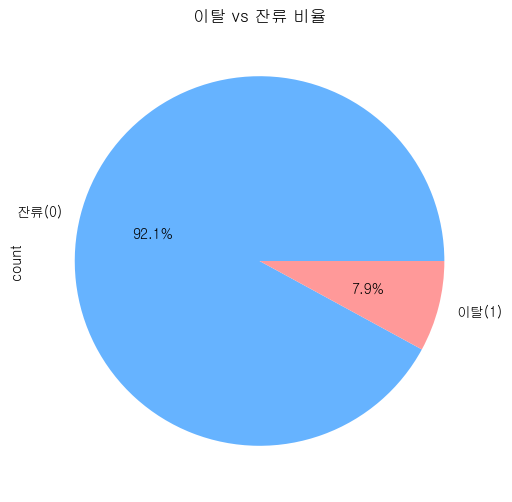

In [5]:
# 이탈 비율 시각화 (1)
plt.figure(figsize=(6, 6))
df['churn'].value_counts().plot(
    kind='pie',
    labels=['잔류(0)', '이탈(1)'],
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999']
)
plt.title('이탈 vs 잔류 비율')
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_25740\2235303475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette=['#66b3ff', '#ff9999'])


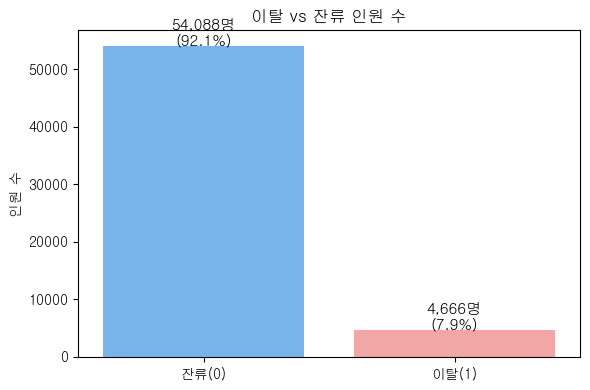

In [6]:
# 이탈 비율 시각화 (1)
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette=['#66b3ff', '#ff9999'])
plt.title('이탈 vs 잔류 인원 수')
plt.xticks([0, 1], ['잔류(0)', '이탈(1)'])
plt.xlabel('')
plt.ylabel('인원 수')

# 막대 위에 숫자 표시
for i, v in enumerate(df['churn'].value_counts().sort_index()):
    plt.text(i, v + 100, f'{v:,}명\n({v/len(df)*100:.1f}%)', 
             ha='center', fontsize=11)
plt.tight_layout()
plt.show()

In [7]:
# 수치형 전처리 (height, age)

# height 이상값 제거 (150cm 미만, 200cm 초과)
# df = df[(df['height'] >= 59) & (df['height'] <= 79)]
# print(f"height 이상값 제거 후: {df.shape}")

# age 이상값 제거 (18~60세)
# df = df[(df['age'] >= 18) & (df['age'] <= 60)]
# print(f"age 이상값 제거 후: {df.shape}")

# age 연령대 그룹핑
# df['age_group'] = (df['age'] // 10 * 10).astype(int)
# print("\nage_group 분포:")
# print(df['age_group'].value_counts().sort_index())

In [8]:
# 수치형 전처리 (height, age)

# height 이상값 제거 (결측치 + 30인치 미만만 제거)
df = df.drop(df.index[df['height'].isna()])   # 결측치 제거
df = df.drop(df.index[df['height'] < 30])     # 이상치 제거
print(f"height 이상값 제거 후: {df.shape}")

# age 이상값 제거 (18~70세)
df = df[df['age'].between(18, 70)].copy()
print(f"age 이상값 제거 후: {df.shape}")

# age 연령대 그룹핑
df['age_group'] = (df['age'] // 10 * 10).astype(int)
print("\nage_group 분포:")
print(df['age_group'].value_counts().sort_index())

height 이상값 제거 후: (58751, 19)
age 이상값 제거 후: (58751, 19)

age_group 분포:
age_group
10      912
20    27699
30    19782
40     7316
50     2849
60      193
Name: count, dtype: int64


In [9]:
# sex 인코딩

# 성별 인코딩 (f → 0, m → 1)
df['sex'] = df['sex'].map({'f': 0, 'm': 1}).astype('int8')

print(df['sex'].value_counts())


sex
1    35263
0    23488
Name: count, dtype: int64


In [10]:
# orientation 인코딩

# 성적 지향 인코딩 (straight → 0, gay/bisexual → 1)
df['orientation'] = df['orientation'].astype('string').str.strip().str.lower()

orientation_map = {
    'straight': 0,   # 이성애자
    'gay': 1,        # 동성애자
    'bisexual': 1    # 양성애자
}

df['orientation'] = df['orientation'].map(orientation_map).astype('int8')

print("orientation 인코딩 결과:")
print(df['orientation'].value_counts())


orientation 인코딩 결과:
orientation
0    50507
1     8244
Name: count, dtype: int64


In [11]:
# education 인코딩
print("education 현재 값:")
print(df['education'].value_counts())

education 현재 값:
education
graduated from college/university    23580
graduated from masters program        8666
working on college/university         5683
working on masters program            1681
graduated from two-year college       1481
graduated from high school            1391
graduated from ph.d program           1209
graduated from law school             1083
working on two-year college           1062
working on ph.d program                980
dropped out of college/university      960
college/university                     781
graduated from space camp              645
dropped out of space camp              514
graduated from med school              439
working on space camp                  439
working on law school                  268
working on med school                  212
two-year college                       208
dropped out of two-year college        182
dropped out of masters program         135
masters program                        128
dropped out of ph.d program 

In [12]:
# 석사 이상
high_edu = [
    'graduated from masters program', 'working on masters program',
    'graduated from ph.d program', 'working on ph.d program',
    'graduated from med school', 'working on law school',
    'working on med school', 'dropped out of masters program',
    'masters program', 'dropped out of ph.d program',
    'ph.d program', 'law school', 'graduated from law school',
    'dropped out of law school', 'dropped out of med school', 'med school'
]
# 대학교 졸업
univ_grad = [
    'graduated from college/university', 'graduated from two-year college',
    'college/university'
]
# 대학교 재학
univ_ing = [
    'working on college/university', 'working on two-year college',
    'dropped out of college/university', 'two-year college',
    'dropped out of two-year college'
]
# 고등학교 이하
high_school = [
    'graduated from high school', 'dropped out of high school',
    'high school', 'working on high school'
]
# 기타
other = [
    'graduated from space camp', 'dropped out of space camp',
    'working on space camp', 'space camp'
]

# 값 통합
df['education'] = df['education'].replace(high_edu, 'high_edu')
df['education'] = df['education'].replace(univ_grad, 'univ_grad')
df['education'] = df['education'].replace(univ_ing, 'univ_ing')
df['education'] = df['education'].replace(high_school, 'high_school')
df['education'] = df['education'].replace(other, 'other')

print("\neducation 통합 후:")
print(df['education'].value_counts())

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['education'], drop_first=True)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'education' in c])


education 통합 후:
education
univ_grad      25842
high_edu       14999
univ_ing        8095
high_school     1671
other           1653
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['education_high_school', 'education_other', 'education_univ_grad', 'education_univ_ing']


In [13]:
# body_type 인코딩
print("body_type 현재 값:")
print(df['body_type'].value_counts())

body_type 현재 값:
body_type
average           14284
fit               12441
athletic          11686
thin               4627
curvy              3836
a little extra     2529
skinny             1774
full figured        982
overweight          431
jacked              406
used up             338
rather not say      194
Name: count, dtype: int64


In [14]:
# used up, rather not say → 결측치 처리
df['body_type'] = df['body_type'].replace({'used up': np.nan, 'rather not say': np.nan})

# 4그룹으로 단순화
body_map = {
    # 마름
    'thin': 'slim',
    'skinny': 'slim',
    # 보통
    'average': 'average',
    # 건강
    'fit': 'fit',
    'athletic': 'fit',
    'jacked': 'fit',
    # 통통
    'curvy': 'curvy',
    'a little extra': 'curvy',
    'full figured': 'curvy',
    'overweight': 'curvy',
}

df['body_type'] = df['body_type'].map(body_map)

print("\nbody_type 통합 후:")
print(df['body_type'].value_counts())

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['body_type'], drop_first=False)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'body_type' in c])


body_type 통합 후:
body_type
fit        24533
average    14284
curvy       7778
slim        6401
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['body_type_average', 'body_type_curvy', 'body_type_fit', 'body_type_slim']


In [15]:
# smokes 인코딩
print("smokes 현재 값:")
print(df['smokes'].value_counts())

smokes 현재 값:
smokes
no                42863
sometimes          3749
when drinking      3022
yes                2206
trying to quit     1457
Name: count, dtype: int64


In [16]:
# 3그룹으로 단순화
# 비흡연
no_smoke = ['no']
# 가끔 흡연
sometime_smoke = ['sometimes', 'when drinking']
# 흡연 & 금연시도중
smoke = ['yes', 'trying to quit']

# smokes 컬럼 값 통합
df['smokes'] = df['smokes'].replace(no_smoke, 'no_smoke')
df['smokes'] = df['smokes'].replace(sometime_smoke, 'sometime_smoke')
df['smokes'] = df['smokes'].replace(smoke, 'smoke')

print("\nsmokes 통합 후:")
print(df['smokes'].value_counts())

# # 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['smokes'], drop_first=True)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'smokes' in c])


smokes 통합 후:
smokes
no_smoke          42863
sometime_smoke     6771
smoke              3663
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['smokes_smoke', 'smokes_sometime_smoke']


In [17]:
# drugs 인코딩
print("drugs 현재 값:")
print(df['drugs'].value_counts())

drugs 현재 값:
drugs
never        36785
sometimes     7620
often          394
Name: count, dtype: int64


In [18]:
# 1. 결측치 처리 (가장 빈도가 높은 'never'로 채우기)
df['drugs'] = df['drugs'].fillna('never')

# 레이블 인코딩 (never: 2, sometimes: 1, often: 0)
drug_map = {
    'never': 2,      # 안 함
    'sometimes': 1,  # 가끔
    'often': 0       # 자주
}

df['drugs'] = df['drugs'].map(drug_map).astype('int8')

# 결과 확인
print("\ndrugs 인코딩 후:")
print(df['drugs'].value_counts())


drugs 인코딩 후:
drugs
2    50737
1     7620
0      394
Name: count, dtype: int64


In [19]:
# drinks 인코딩
print("drinks 현재 값:")
print(df['drinks'].value_counts())

drinks 현재 값:
drinks
socially       41050
rarely          5765
often           5108
not at all      3125
very often       462
desperately      313
Name: count, dtype: int64


In [20]:
# 3그룹으로 단순화
drinks_map = {
    # 안마신다
    'not at all': 'no_drinks',
    'rarely': 'no_drinks',
    # 적당히 마신다
    'socially': 'moderate',
    # 많이 마신다
    'often': 'heavy',
    'very often': 'heavy',
    'desperately': 'heavy'
}

df['drinks'] = df['drinks'].map(drinks_map)

print("\ndrinks 통합 후:")
print(df['drinks'].value_counts())

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['drinks'], drop_first=False)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'drinks' in c])


drinks 통합 후:
drinks
moderate     41050
no_drinks     8890
heavy         5883
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['drinks_heavy', 'drinks_moderate', 'drinks_no_drinks']


In [21]:
# sign 인코딩
print('sign 현재 값:')
print(df['sign'].value_counts().head(10))

sign 현재 값:
sign
scorpio and it&rsquo;s fun to think about        1742
gemini and it&rsquo;s fun to think about         1736
leo and it&rsquo;s fun to think about            1659
libra and it&rsquo;s fun to think about          1620
taurus and it&rsquo;s fun to think about         1598
cancer and it&rsquo;s fun to think about         1565
sagittarius and it&rsquo;s fun to think about    1556
pisces and it&rsquo;s fun to think about         1553
virgo and it&rsquo;s fun to think about          1546
aries and it&rsquo;s fun to think about          1540
Name: count, dtype: int64


In [22]:
# 별자리 믿음 여부로 이진화
def classify_belief(text):
     # 결측치 처리 (NaN이면 안 믿는다로 분류)
    if pd.isna(text):
        return 0
    
    # 믿는 그룹의 키워드가 포함되어 있는지 확인
    if 'fun to think about' in text or 'matters a lot' in text:
        return 1
    
     # 그 외 (doesn't matter 또는 별자리 이름만 있는 경우)
    else:
        return 0

# 새로운 컬럼 생성 (두번 실행 금지)
df['sign'] = df['sign'].apply(classify_belief)

# 결과 확인
print("\nsign 인코딩 후:")
print(df['sign'].value_counts())


sign 인코딩 후:
sign
0    39157
1    19594
Name: count, dtype: int64


In [23]:
# religion 인코딩
print("religion 현재 값:")
print(df['religion'].value_counts().head(10))

religion 현재 값:
religion
agnosticism                                  2680
agnosticism but not too serious about it     2596
other                                        2593
agnosticism and laughing about it            2464
catholicism but not too serious about it     2281
atheism                                      2150
other and laughing about it                  2068
atheism and laughing about it                2051
christianity                                 1914
christianity but not too serious about it    1901
Name: count, dtype: int64


In [24]:
# 무교 그룹
religion_none = [
    'agnosticism', 'atheism',
    'atheism and laughing about it', 'atheism but not too serious about it',
    'atheism and somewhat serious about it', 'agnosticism but not too serious about it',
    'agnosticism and laughing about it', 'agnosticism and somewhat serious about it',
    'atheism and very serious about it', 'agnosticism and very serious about it',
]
# 종교 신자 그룹
religion = [
    'other', 'catholicism but not too serious about it',
    'other and laughing about it', 'christianity',
    'christianity but not too serious about it', 'other but not too serious about it',
    'judaism but not too serious about it', 'catholicism',
    'christianity and somewhat serious about it', 'other and somewhat serious about it',
    'catholicism and laughing about it', 'judaism and laughing about it',
    'buddhism but not too serious about it', 'judaism',
    'christianity and very serious about it', 'catholicism and somewhat serious about it',
    'other and very serious about it', 'buddhism and laughing about it',
    'buddhism', 'christianity and laughing about it',
    'buddhism and somewhat serious about it', 'judaism and somewhat serious about it',
    'hinduism but not too serious about it', 'hinduism', 'catholicism and very serious about it',
    'buddhism and very serious about it', 'hinduism and somewhat serious about it',
    'islam', 'hinduism and laughing about it', 'islam but not too serious about it',
    'islam and somewhat serious about it', 'judaism and very serious about it',
    'islam and laughing about it', 'hinduism and very serious about it',
    'islam and very serious about it'
]

# religion 컬럼 값 통합
df['religion'] = df['religion'].replace(religion_none, 'no_religion')
df['religion'] = df['religion'].replace(religion, 'religion')

print("\nreligion 통합 후:")
print(df['religion'].value_counts())

# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['religion'], drop_first=False)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'religion' in c])


religion 통합 후:
religion
religion       23190
no_religion    15580
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['religion_no_religion', 'religion_religion']


In [25]:
# job 인코딩
print("job 현재 값:")
print(df['job'].value_counts())

job 현재 값:
job
other                                7399
student                              4855
science / tech / engineering         4808
computer / hardware / software       4661
sales / marketing / biz dev          4335
artistic / musical / writer          4316
medicine / health                    3559
education / academia                 3421
executive / management               2329
banking / financial / real estate    2234
entertainment / media                2223
law / legal services                 1352
hospitality / travel                 1346
construction / craftsmanship          993
clerical / administrative             791
political / government                686
rather not say                        423
transportation                        358
unemployed                            267
military                              198
retired                               138
Name: count, dtype: int64


In [26]:
# 6그룹으로 분류
df['job_encoding'] = np.select(
    [
        # 1. IT/과학
        ((df['job'] == 'science / tech / engineering') | 
         (df['job'] == 'computer / hardware / software')),
        # 2. 비즈니스/금융
        ((df['job'] == 'sales / marketing / biz dev') | 
         (df['job'] == 'executive / management') | 
         (df['job'] == 'banking / financial / real estate')),
        # 3. 예술/미디어
        ((df['job'] == 'artistic / musical / writer') | 
         (df['job'] == 'entertainment / media')),
        # 4. 전문직
        ((df['job'] == 'education / academia') | 
         (df['job'] == 'medicine / health') | 
         (df['job'] == 'political / government') | 
         (df['job'] == 'law / legal services')),
        # 5. 서비스/기타직종
        ((df['job'] == 'hospitality / travel') | 
         (df['job'] == 'construction / craftsmanship') | 
         (df['job'] == 'clerical / administrative') | 
         (df['job'] == 'transportation') | 
         (df['job'] == 'military')),
    ],
    [1, 2, 3, 4, 5],
    default=6   # student, unemployed, retired, other, rather not say, 결측치
)              

print("\njob 인코딩 후:")
print(df['job_encoding'].value_counts())


job 인코딩 후:
job_encoding
6    21141
1     9469
4     9018
2     8898
3     6539
5     3686
Name: count, dtype: int64


In [27]:
# status 인코딩
print("status 현재 값:")
print(df['status'].value_counts())

status 현재 값:
status
single            54560
seeing someone     2050
available          1831
married             300
unknown              10
Name: count, dtype: int64


In [28]:
# single → 1, 나머지 → 0 레이블 인코딩
df['status_encoding'] = np.select(
    [df['status'] == 'single'],
    [1],
    default=0
)

print("\nstatus 인코딩 후:")
print(df['status_encoding'].value_counts())


status 인코딩 후:
status_encoding
1    54560
0     4191
Name: count, dtype: int64


In [29]:
# diet 인코딩
print("diet 현재 값:")
print(df['diet'].value_counts())

diet 현재 값:
diet
mostly anything        16258
anything                6060
strictly anything       5072
mostly vegetarian       3333
mostly other             972
strictly vegetarian      866
vegetarian               661
strictly other           440
mostly vegan             329
other                    319
strictly vegan           227
vegan                    136
mostly kosher             86
mostly halal              47
strictly halal            18
strictly kosher           18
halal                     11
kosher                    10
Name: count, dtype: int64


In [30]:
# 채식/비채식 이진화
df['diet_encoding'] = np.select(
    [((df['diet'] == 'vegetarian') | (df['diet'] == 'mostly vegetarian') | 
      (df['diet'] == 'strictly vegetarian') | (df['diet'] == 'vegan') | 
      (df['diet'] == 'mostly vegan') | (df['diet'] == 'strictly vegan'))],
    [1],  # 채식/비건 = 1
    default=0   # 비채식 = 0
)

print("\ndiet 인코딩 후:")
print(df['diet_encoding'].value_counts())


diet 인코딩 후:
diet_encoding
0    53199
1     5552
Name: count, dtype: int64


In [31]:
# ethnicity 인코딩 (인종)
print("ethnicity 현재 값:")
print(df['ethnicity'].value_counts())

ethnicity 현재 값:
ethnicity
white                                                                                        31951
asian                                                                                         6089
hispanic / latin                                                                              2798
black                                                                                         1976
other                                                                                         1666
                                                                                             ...  
asian, middle eastern, native american, indian, pacific islander, hispanic / latin, white        1
asian, native american, indian, pacific islander, hispanic / latin, white, other                 1
asian, middle eastern, black, pacific islander, hispanic / latin                                 1
asian, black, pacific islander, white, other                                       

In [32]:
# 5그룹 + mixed로 단순화
all_ethnicity = df['ethnicity'].value_counts().index.tolist()
# non-mixed
mixed_none = ['white', 'asian', 'black', 'hispanic / latin', 'other']
# mixed
remaining = [item for item in all_ethnicity if item not in mixed_none]
# mixed로 통합
df['ethnicity'] = df['ethnicity'].replace(remaining, 'mixed')

print("\nethnicity 통합 후:")
print(df['ethnicity'].value_counts())

# 범주형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['ethnicity'], drop_first=False)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'ethnicity' in c])


ethnicity 통합 후:
ethnicity
white               31951
mixed                8682
asian                6089
hispanic / latin     2798
black                1976
other                1666
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['ethnicity_asian', 'ethnicity_black', 'ethnicity_hispanic / latin', 'ethnicity_mixed', 'ethnicity_other', 'ethnicity_white']


In [33]:
# pets 인코딩
print("pets 현재 값:")
print(df['pets'].value_counts())

pets 현재 값:
pets
likes dogs and likes cats          14525
likes dogs                          7125
likes dogs and has cats             4187
has dogs                            4044
has dogs and likes cats             2286
likes dogs and dislikes cats        2001
has dogs and has cats               1427
has cats                            1348
likes cats                          1039
has dogs and dislikes cats           544
dislikes dogs and likes cats         228
dislikes dogs and dislikes cats      185
dislikes cats                        120
dislikes dogs and has cats            79
dislikes dogs                         44
Name: count, dtype: int64


In [34]:
# 강아지파
df['dogs_encoding'] = np.select(
    [((df['pets'] == 'has dogs') | (df['pets'] == 'likes dogs and likes cats') |
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes dogs') |
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and dislikes cats') |
      (df['pets'] == 'has dogs and likes cats') | (df['pets'] == 'likes dogs and dislikes cats'))],
    [1],
    default=0
)

# 고양이파
df['cats_encoding'] = np.select(
    [((df['pets'] == 'has cats') | (df['pets'] == 'likes dogs and likes cats') |
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes cats') |
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and likes cats') |
      (df['pets'] == 'dislikes dogs and likes cats') | (df['pets'] == 'dislikes dogs and has cats'))],
    [1],
    default=0
)

print("\ndogs_encoding 결과:")
print(df['dogs_encoding'].value_counts())
print("\ncats_encoding 결과:")
print(df['cats_encoding'].value_counts())


dogs_encoding 결과:
dogs_encoding
1    36139
0    22612
Name: count, dtype: int64

cats_encoding 결과:
cats_encoding
0    33632
1    25119
Name: count, dtype: int64


In [35]:
# location 인코딩
print("location 현재 값:")
print(df['location'].value_counts().head(10))

location 현재 값:
location
san francisco, california    30718
oakland, california           7070
berkeley, california          4089
san mateo, california         1296
palo alto, california         1042
alameda, california            892
hayward, california            735
emeryville, california         722
san rafael, california         695
redwood city, california       678
Name: count, dtype: int64


In [36]:
# city 추출
df['location'] = df['location'].astype('string').str.strip().str.lower()
df['city'] = df['location'].str.split(',').str[0].str.strip()

# 지역 매핑
SF = {'san francisco'}

PENINSULA_SOUTH_BAY = {
    'daly city', 'south san francisco', 'san bruno', 'millbrae', 'san mateo',
    'burlingame', 'foster city', 'belmont', 'san carlos', 'redwood city',
    'redwood shores', 'menlo park', 'atherton', 'east palo alto',
    'palo alto', 'mountain view', 'stanford', 'brisbane', 'colma', 'hillsborough',
    'pacifica', 'half moon bay', 'montara', 'moss beach', 'el granada'
}

EAST_BAY = {
    'oakland', 'west oakland', 'berkeley', 'alameda', 'emeryville', 'albany',
    'hayward', 'san leandro', 'san lorenzo', 'castro valley', 'union city', 'fremont',
    'richmond', 'point richmond', 'el cerrito', 'san pablo', 'el sobrante', 'pinole', 'hercules',
    'walnut creek', 'pleasant hill', 'martinez', 'lafayette', 'orinda', 'moraga', 'concord',
    'piedmont', 'kensington', 'pacheco', 'rodeo', 'crockett', 'port costa', 'oakley'
}

NORTH_BAY = {
    'sausalito', 'mill valley', 'tiburon', 'belvedere tiburon', 'larkspur', 'corte madera',
    'kentfield', 'fairfax', 'san anselmo', 'san rafael', 'ross', 'green brae',
    'marin city', 'bolinas', 'lagunitas', 'woodacre', 'forest knolls', 'nicasio',
    'olema', 'muir beach', 'stinson beach', 'novato',
    'petaluma', 'rohnert park', 'santa rosa',
    'vallejo', 'benicia', 'vacaville'
}

# 지역 매핑 함수
def map_bay_region(city):
    if pd.isna(city):
        return np.nan
    if city in SF:
        return 'sf'
    if city in PENINSULA_SOUTH_BAY:
        return 'south_bay'
    if city in EAST_BAY:
        return 'east_bay'
    if city in NORTH_BAY:
        return 'north_bay'
    return 'outside'

df['location_group'] = df['city'].apply(map_bay_region)

print("\nlocation_group 통합 후:")
print(df['location_group'].value_counts())

# 원-핫 인코딩
df = pd.get_dummies(df, columns=['location_group'], drop_first=False)
print("\n원-핫 인코딩 후 컬럼:", [c for c in df.columns if 'location' in c])


location_group 통합 후:
location_group
sf           30718
east_bay     17919
south_bay     7091
north_bay     2830
outside        193
Name: count, dtype: int64

원-핫 인코딩 후 컬럼: ['location', 'location_group_east_bay', 'location_group_north_bay', 'location_group_outside', 'location_group_sf', 'location_group_south_bay']


In [37]:
# 인코딩 완료된 원본 컬럼 제거

# 원본 컬럼 제거
drop_cols = [
    'job',          # job_encoding으로 대체
    'status',       # status_encoding으로 대체
    'diet',         # diet_encoding으로 대체
    'pets',         # dogs_encoding, cats_encoding으로 대체
    'location',     # location_group으로 대체
    'city',         # location_group으로 대체
    'last_online',  # churn 생성 후 필요 없음
    'age',          # age_group으로 대체
]

df = df.drop(columns=drop_cols)

print(f"최종 shape: {df.shape}")
print(f"\n최종 컬럼 목록:")
print(df.columns.tolist())

최종 shape: (58751, 38)

최종 컬럼 목록:
['sex', 'orientation', 'drugs', 'height', 'sign', 'churn', 'age_group', 'education_high_school', 'education_other', 'education_univ_grad', 'education_univ_ing', 'body_type_average', 'body_type_curvy', 'body_type_fit', 'body_type_slim', 'smokes_smoke', 'smokes_sometime_smoke', 'drinks_heavy', 'drinks_moderate', 'drinks_no_drinks', 'religion_no_religion', 'religion_religion', 'job_encoding', 'status_encoding', 'diet_encoding', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hispanic / latin', 'ethnicity_mixed', 'ethnicity_other', 'ethnicity_white', 'dogs_encoding', 'cats_encoding', 'location_group_east_bay', 'location_group_north_bay', 'location_group_outside', 'location_group_sf', 'location_group_south_bay']


In [38]:
# 누락된 결측치 여부 확인

missing = df.isnull().sum()
missing_columns = missing[missing > 0]
print('결측치 있는 컬럼:')
print(missing_columns)
print(f'\n결측치 비율:')
print((missing_columns / len(df) * 100).round(2))

# -> 결측치가 원-핫 인코딩 과정에서 어느 카테고리에도 속하지 않음 (전부 0)으로 자동처리됨


결측치 있는 컬럼:
Series([], dtype: int64)

결측치 비율:
Series([], dtype: float64)


In [39]:
# 스케일링 - 수치형 컬럼 (height, age_group)에 대해 스케일링 진행
from sklearn.preprocessing import StandardScaler

# 스케일링 대상 컬럼
scale_columns = ['height', 'age_group']

# 스케일러 생성 및 적용
scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

# 결과 확인
print('스케일링 후 수치형 컬럼 통계:')
print(df[scale_columns].describe().round(2))

# -> result: mean(평균) 0, std(표준편차) 1 -> standardscaler가 정상적으로 적용됨


스케일링 후 수치형 컬럼 통계:
         height  age_group
count  58751.00   58751.00
mean       0.00      -0.00
std        1.00       1.00
min       -2.45      -1.92
25%       -0.61      -0.81
50%       -0.08       0.30
75%        0.70       0.30
max        2.81       3.64


In [40]:
# 전처리 완료 데이터 저장
df.to_csv('../data/processed/okcupid_preprocessed.csv', 
          index=False, encoding='utf-8-sig')
print(f"최종 shape: {df.shape}")

최종 shape: (58751, 38)
